#**Predicting House Prices using Machine Learning**


#Import Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

#Load the housing dataset

In [4]:
data=pd.read_csv('/content/USA_Housing.csv')

In [ ]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


#Preprocess the data

In [ ]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
data.shape

(5000, 7)

In [ ]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                False                False                      False   
1                False                False                      False   
2                False                False                      False   
3                False                False                      False   
4                False                False                      False   
...                ...                  ...                        ...   
4995             False                False                      False   
4996             False                False                      False   
4997             False                False                      False   
4998             False                False                      False   
4999             False                False                      False   

      Avg. Area Number of Bedrooms  Area Populati

In [ ]:
data.info

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [ ]:
data.describe

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

#Model Training

In [ ]:
x=data.iloc[:, :-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [ ]:
y=data.iloc[:, -1]
y

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
476,84439.855749,4.313978,7.698765,4.48,19835.247317,1.242422e+06
2298,70689.364339,5.865246,6.462900,3.29,21350.099746,9.730686e+05
3813,71068.996114,4.746896,9.387913,6.20,35724.018492,1.355557e+06
4538,74497.673077,6.166026,8.142658,4.01,28160.457535,1.204753e+06
1068,79575.641539,4.970709,5.850243,4.04,31050.102814,1.141917e+06
...,...,...,...,...,...,...
3671,67097.092120,6.086754,7.211963,3.05,27191.506877,1.027428e+06
709,62357.030953,6.725271,7.126592,5.00,23382.539386,9.724178e+05
2487,79687.761870,6.010368,7.337394,6.09,20867.669885,1.360101e+06
174,83347.669697,5.468158,5.475253,3.14,48226.718928,1.453382e+06


In [ ]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
2175,66083.165901,4.213323,8.908381,4.17,39185.995034,1.051173e+06
3156,56180.591431,6.201921,7.180671,4.27,41036.284152,1.139073e+06
337,77733.731186,5.624500,5.967832,3.23,32074.575986,1.236932e+06
444,47065.053303,5.767575,7.266028,5.49,24125.875810,5.668962e+05
2334,71028.175896,3.895831,6.623776,2.50,43922.630172,9.346104e+05
...,...,...,...,...,...,...
1862,60288.475915,6.170239,7.014315,3.28,34651.072317,1.144938e+06
1028,61839.767863,7.740113,5.937847,3.24,26064.820316,9.615391e+05
4430,78529.527679,7.060888,7.634762,5.20,23897.116272,1.578087e+06
3025,56505.827795,5.300534,7.795375,3.43,30995.488167,9.764817e+05


In [ ]:
y_train

476          125 Jesse Spring\nNew Benjaminberg, NY 16741
2298                     PSC 7179, Box 6714\nAPO AA 57159
3813                       USNV Wright\nFPO AA 70734-4928
4538    03161 Lori Meadows Suite 563\nAndersonfurt, MT...
1068    4827 Kelsey Glen Suite 220\nMichaeltown, MD 34529
                              ...                        
3671    052 Thomas Square Apt. 034\nWrightmouth, OR 04272
709                      PSC 9682, Box 5865\nAPO AA 11465
2487    932 Schwartz Park Suite 892\nSouth Brian, CT 5...
174          0647 Ramirez Hill\nNew Crystalport, AZ 33060
1146    12315 Johnson Corners Suite 788\nWest Tyler, W...
Name: Address, Length: 4000, dtype: object

In [ ]:
y_test

2175    54042 Proctor Corner Apt. 796\nNew Staceyville...
3156     121 Morris Rue Apt. 772\nWillisborough, NM 03840
337                 672 Larson Ramp\nRobertside, NC 16903
444     006 Miller Orchard Suite 211\nPort Louis, WY 0...
2334            3757 Price Rue\nEast Colin, MD 62622-8672
                              ...                        
1862    0163 Samantha Coves Apt. 848\nPort Heidiville,...
1028                     PSC 9596, Box 0250\nAPO AE 81289
4430         2631 Ellis Walk\nSamanthatown, VT 51809-6834
3025               770 Cole Rest\nLunafurt, FL 70678-5139
1807        0995 Olivia Land Apt. 728\nAlexport, CA 92200
Name: Address, Length: 1000, dtype: object

In [ ]:
x_train = x_train.iloc[:, 1:]
x_test = x_test.iloc[:, 1:]

In [ ]:
x_train["Income"].value_counts()

19835.24731691517     1
20038.86189595382     1
42956.53944156406     1
28171.985010499327    1
43609.46243378679     1
                     ..
33970.16499037125     1
27456.64493437836     1
42652.460595898185    1
34050.12991892165     1
28214.3635513084      1
Name: Income, Length: 4000, dtype: int64

In [ ]:
x_train["Income"] = x_train["Income"].astype(str)
x_test["Income"] = x_test["Income"].astype(str)
make_train = x_train["Income"].str.split(" ", expand=True)
make_test = x_test["Income"].str.split(" ", expand=True)

#Visualize

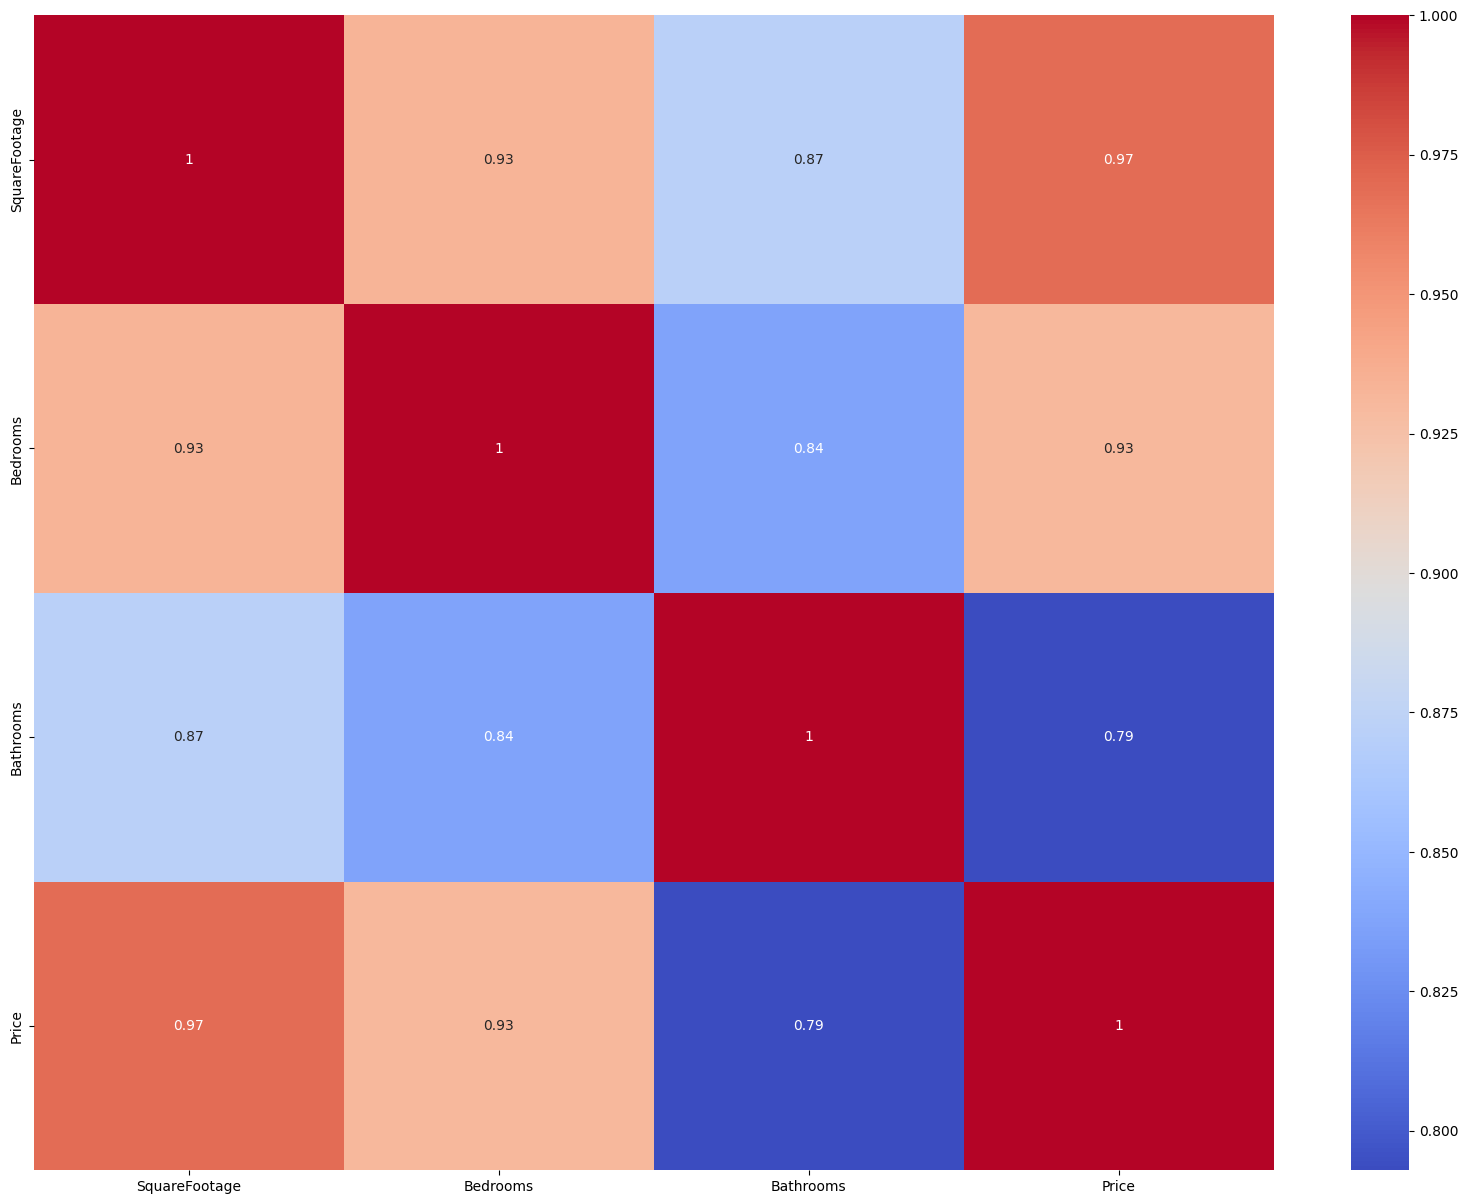

In [ ]:
mplt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

<ipython-input-6-a70e66c40847>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


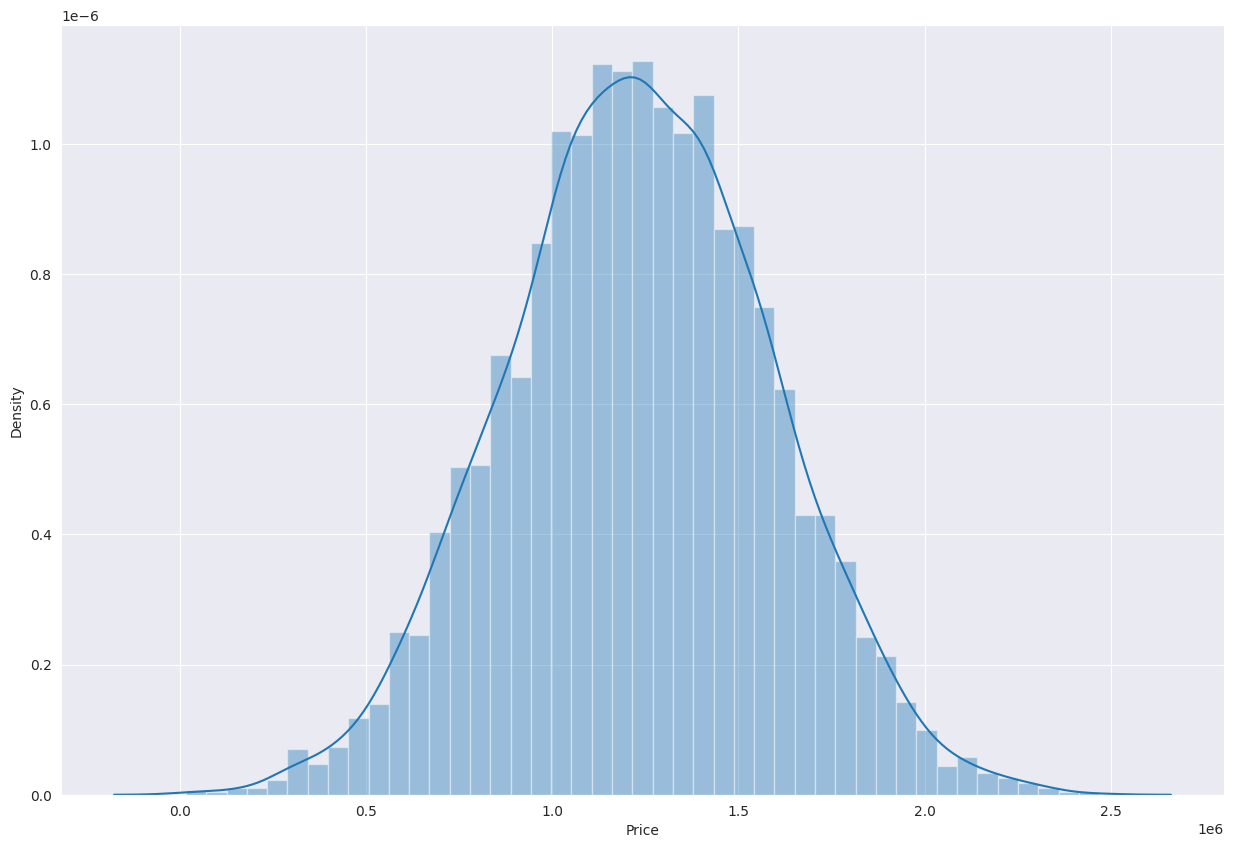

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Price)
plt.show()